<a href="https://colab.research.google.com/github/mustafasherbini/ML-models-and-preprocicing-for-hardware-dataset/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
data=pd.read_csv('DataSet.csv')
data.head(2)
data.columns=["Vendor Name","Model Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"] 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
data.isnull().sum()


Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [ ]:
data.columns

Index(['Vendor Name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [ ]:
data_orig=data.copy()

In [ ]:
data.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Vendor Name'] = LE.fit_transform(data['Vendor Name'])
data['Model Name'] = LE.fit_transform(data['Model Name'])

data.head(100)


,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,29,125,256,6000,256,16,128,198,199
1,1,62,29,8000,32000,32,8,32,269,253
2,1,63,29,8000,32000,32,8,32,220,253
3,1,64,29,8000,32000,32,8,32,172,253
4,1,65,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
95,17,24,26,16000,32000,64,16,24,465,361
96,17,25,26,16000,32000,64,8,24,465,350
97,17,26,26,8000,32000,0,8,24,277,220
98,17,27,26,8000,16000,0,8,16,185,113


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Vendor Name  209 non-null    int32
 1   Model Name   209 non-null    int32
 2   MYCT         209 non-null    int64
 3   MMIN         209 non-null    int64
 4   MMAX         209 non-null    int64
 5   CACH         209 non-null    int64
 6   CHMIN        209 non-null    int64
 7   CHMAX        209 non-null    int64
 8   PRP          209 non-null    int64
 9   ERP          209 non-null    int64
dtypes: int32(2), int64(8)
memory usage: 14.8 KB


In [ ]:
data.corr()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
Vendor Name,1.000000,-0.127345,-0.080296,-0.083438,0.008180,0.005729,0.037202,-0.012555,-0.021662,-0.020321
Model Name,-0.127345,1.000000,0.048600,-0.126972,-0.176645,-0.035492,-0.218127,-0.154152,-0.192771,-0.181206
MYCT,-0.080296,0.048600,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.083438,-0.126972,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,0.008180,-0.176645,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,0.005729,-0.035492,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,0.037202,-0.218127,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.012555,-0.154152,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.021662,-0.192771,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.020321,-0.181206,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


<AxesSubplot:>

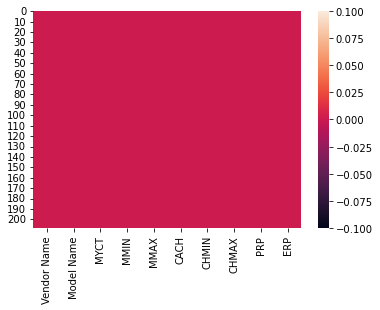

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
data.describe()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,15.937799,104.000000,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,7.490440,60.477268,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,0.000000,0.000000,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,10.000000,52.000000,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,17.000000,104.000000,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,21.000000,156.000000,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,29.000000,208.000000,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
data.columns

Index(['Vendor Name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [ ]:
data=data[['MYCT', 'MMIN', 'MMAX', 'CACH',
       'CHMIN', 'CHMAX', 'PRP', 'ERP']]
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)


MYCT       175.0
MMIN      3232.0
MMAX     12000.0
CACH        32.0
CHMIN        5.0
CHMAX       19.0
PRP         86.0
ERP         73.0
dtype: float64


In [ ]:
print((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR)))

      MYCT   MMIN   MMAX   CACH  CHMIN  CHMAX    PRP    ERP
0    False  False  False   True   True   True  False  False
1    False  False  False  False  False  False   True   True
2    False  False  False  False  False  False  False   True
3    False  False  False  False  False  False  False   True
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
204  False  False  False  False  False  False  False  False
205  False  False  False  False  False  False  False  False
206  False  False  False  False  False  False  False  False
207  False  False  False  False  False  False  False  False
208  False  False  False  False  False  False  False  False

[209 rows x 8 columns]


In [ ]:
data["CHMIN"].quantile(0.90)

12.0

In [ ]:
data["CHMIN"].quantile(0.10)

1.0

In [ ]:
data["CHMIN"] = np.where(data["CHMIN"]<1.0 , 1.0,data["CHMIN"])
data["CHMIN"] = np.where(data["CHMIN"]>12.0 , 12.0,data["CHMIN"])

In [ ]:
print((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR)))

      MYCT   MMIN   MMAX   CACH  CHMIN  CHMAX    PRP    ERP
0    False  False  False   True  False   True  False  False
1    False  False  False  False  False  False   True   True
2    False  False  False  False  False  False  False   True
3    False  False  False  False  False  False  False   True
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
204  False  False  False  False  False  False  False  False
205  False  False  False  False  False  False  False  False
206  False  False  False  False  False  False  False  False
207  False  False  False  False  False  False  False  False
208  False  False  False  False  False  False  False  False

[209 rows x 8 columns]


In [ ]:
data["CACH"].quantile(0.90)

64.0

In [ ]:
data["CACH"].quantile(0.10)

0.0

In [ ]:
data["CACH"] = np.where(data["CACH"]<0.0 , 0.0,data["CACH"])
data["CACH"] = np.where(data["CACH"]>64.0 , 64.0,data["CACH"])

In [ ]:
print(data["CHMAX"].quantile(0.90))
print(data["CHMAX"].quantile(0.10))
data["CHMAX"] = np.where(data["CHMAX"]>32.0,20,data["CHMAX"]);


32.0
2.0


In [ ]:
print(data["PRP"].quantile(0.90))
print(data["PRP"].quantile(0.10))

261.00000000000017
17.0


In [ ]:
data["PRP"] = np.where(data["PRP"]>26.0,17.0,data["PRP"]);

In [ ]:
print(data["ERP"].quantile(0.90))
print(data["ERP"].quantile(0.10))

253.0
20.8


In [ ]:
data["ERP"] = np.where(data["ERP"]>253.0,20.8,data["ERP"]);

In [ ]:
print((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR)))

      MYCT   MMIN   MMAX   CACH  CHMIN  CHMAX    PRP    ERP
0    False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False   True
2    False  False  False  False  False  False  False   True
3    False  False  False  False  False  False  False   True
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
204  False  False  False  False  False  False  False  False
205  False  False  False  False  False  False  False  False
206  False  False  False  False  False  False  False  False
207  False  False  False  False  False  False  False  False
208  False  False  False  False  False  False  False  False

[209 rows x 8 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MYCT    209 non-null    int64  
 1   MMIN    209 non-null    int64  
 2   MMAX    209 non-null    int64  
 3   CACH    209 non-null    float64
 4   CHMIN   209 non-null    float64
 5   CHMAX   209 non-null    int64  
 6   PRP     209 non-null    float64
 7   ERP     209 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 13.2 KB


MSE: 314.25455532351526
Accuracy: 0.9635355992781538


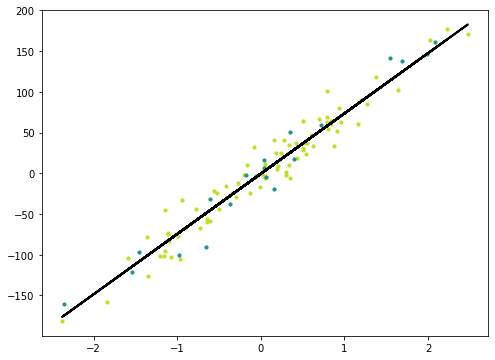

In [ ]:
import numpy as np
import pandas as pd

dt=pd.read_csv("DataSet.csv")

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

dt.head()

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=101
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv("DataSet.csv")



x = data.iloc[:, [2, 3,4,5,6,7,8]].values
y = data.iloc[:, 9].values

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 


from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(xtrain,ytrain)
print("accuracy:",accuracy_score(ytest,logistic.predict(xtest)))



accuracy: 0.03773584905660377


In [ ]:
import tensorflow.python.keras
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.losses import MeanSquaredLogarithmicError

def msle_acc(ytrue, ypred):
    return 1 - msle(ytrue,ypred)


  
msle = MeanSquaredLogarithmicError()
n_cols = xtrain.shape[1]
model = Sequential()
model.add(Dense(80, input_dim=n_cols, activation='relu',kernel_initializer='normal'))
model.add(Dense(240, activation='relu',kernel_initializer='normal')) 
model.add(Dense(128, activation='relu',kernel_initializer='normal')) 
model.add(Dense(1, activation='linear',kernel_initializer='normal'))


model.compile(loss=msle, optimizer='adam', metrics=[msle_acc])
model.summary()

model.fit(xtrain, ytrain, epochs=10, batch_size=1)

model.evaluate(xtest,ytest)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 80)                640       
_________________________________________________________________
dense_74 (Dense)             (None, 240)               19440     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               30848     
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 129       
Total params: 51,057
Trainable params: 51,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
156/156 [==============================] - 1s 4ms/step - loss: 4.9842 - msle_acc: -3.9842
Epoch 2/10
156/156 [==============================] - 0s 1ms/step - loss: 0.1741 - msle_acc: 0.8259
Epoch 3/10
156/156 [==========================

[0.013805483467876911, 0.9867246150970459]